In [38]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import date2num
import matplotlib.patches as mpatches
import pandas as pd
from datetime import datetime
from mpl_toolkits.basemap import Basemap

In [39]:
df = pd.read_csv("./operations.csv", sep=",", low_memory=False)
# data = data[pd.notnull(data['Country'])]

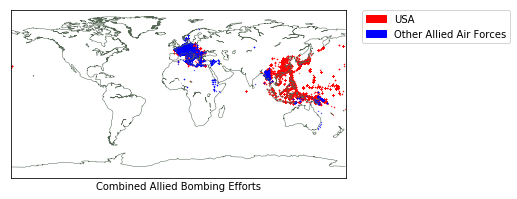

In [62]:
usa = getTargetCoordinates("USA")
everyone_else = getTargetCoordinates("USA", not_this_country=True)

fig, ax = plt.subplots()
earth = Basemap(ax=ax)
earth.drawcoastlines(color='#556655', linewidth=0.5)
ax.scatter(usa['Target Longitude'], usa['Target Latitude'], c='red', s=0.1)
ax.scatter(everyone_else['Target Longitude'], everyone_else['Target Latitude'], c='blue', s= 0.1)

ax.set_xlabel("Combined Allied Bombing Efforts")
usa_efforts = mpatches.Patch(color='red', label='USA')
allied_efforts = mpatches.Patch(color='blue', label='Other Allied Air Forces')
plt.legend(handles=[usa_efforts, allied_efforts], bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)

In [52]:
def getTargetCoordinates(country, **not_this_country):
    if not_this_country:
        this_country = df['Country'] != country
    else:
        this_country = df['Country'] == country
    target_lat = df['Target Latitude'].notnull()
    target_long = df['Target Longitude'].notnull()
    new_df = df[this_country & target_lat & target_long]
    return new_df

        Mission ID Mission Date Theater of Operations Country Air Force  \
0                1    8/15/1943                   MTO     USA     12 AF   
1                2    8/15/1943                   PTO     USA      5 AF   
2                3    8/15/1943                   MTO     USA     12 AF   
3                4    8/15/1943                   MTO     USA     12 AF   
4                5    8/15/1943                   PTO     USA      5 AF   
5                6    8/15/1943                   PTO     USA      5 AF   
6                7    8/15/1943                   PTO     USA      5 AF   
7                8    8/15/1943                   PTO     USA      5 AF   
8                9    8/15/1943                   MTO     USA     12 AF   
9               10    8/15/1943                   MTO     USA     12 AF   
10              11    8/15/1943                   CBI     USA     10 AF   
65              66    8/15/1943                   MTO     USA     12 AF   
66              67    8/1

In [5]:
usa_bombing_dates = [data['Mission Date'] for USA in data['Country'] if USA == 'USA']
gb_bombing_dates = [data['Mission Date'] for GreatBritain in data['Country'] if GreatBritain == 'GREAT BRITAIN']
nz_bombing_dates = [data['Mission Date'] for NewZealand in data['Country'] if NewZealand == 'NEW ZEALAND']
australia_bombing_dates = [data['Mission Date'] for Australia in data['Country'] if Australia == 'AUSTRALIA']
south_africa_bombing_dates = [data['Mission Date'] for SouthAfrica in data['Country'] if SouthAfrica == 'SOUTH AFRICA']

In [6]:
"""

@params dates (dict) - holds the date
"""
def getNumBombingsPerMonth(dates):
    bombings_per_month = {}
    
    
    for date in dates[0]:
        year_month = date.split("/")[0] + '/' + date.split("/")[-1]
        if year_month not in bombings_per_month:
            print 'making new index %s' % (year_month)
            bombings_per_month[year_month] = 1
            print bombings_per_month[year_month]
        else:
#             print 'inserting into %s' % (year_month)
            bombings_per_month[year_month] += 1
    return bombings_per_month

In [7]:
"""

@params dates (dict) - holds the date
"""
def getNumBombingsDaily(dates):
    bombings_per_month = {}
    
    
    for date in dates[0]:
        if date not in bombings_per_month:
            bombings_per_month[date] = 1
        else:
            bombings_per_month[date] += 1
    return bombings_per_month

In [8]:
def splitAndOrderData(dictionary, **dt):
    sorted_monthly = sorted(dictionary.items()) # sort by key, return a list of tuples
    x, y = zip(*sorted_monthly)
    
    if dt:
        # need to convert dates to datetime
        # so we can plot multiple bars onto the graph
        # at once
        sorted_dates = np.array([datetime.strptime(x[0], '%m/%Y') for x in sorted_monthly])
        sorted_quants = np.array([x[1] for x in sorted_monthly])
    else:
        sorted_dates = np.array([x[0] for x in sorted_monthly])
        sorted_quants = np.array([x[1] for x in sorted_monthly])
        
    return date2num(sorted_dates), sorted_quants

In [9]:

# us_monthly = getNumBombingsPerMonth(usa_bombing_dates)
# gb_monthly = getNumBombingsPerMonth(gb_bombing_dates)
# nz_daily = getNumBombingsPerMonth(nz_bombing_dates)
# aus_daily = getNumBombingsPerMonth(australia_bombing_dates)
# south_africa_monthly = getNumBombingsPerMonth(south_africa_bombing_dates)




In [95]:
# us_dates, us_quants = splitAndOrderData(us_monthly, dt=True)
# gb_dates, gb_quants = splitAndOrderData(gb_monthly, dt=True)
# nz_dates, nz_quants = splitAndOrderData(nz_monthly, dt=True)
# aus_dates, aus_quants = splitAndOrderData(australia_monthly, dt=True)
# sa_dates, sa_quants = splitAndOrderData(south_africa_monthly, dt=True)

# ax = plt.subplot(111)
# w = 10

# ax.scatter(us_dates - w, us_quants, color='b', alpha=0.5)
# ax.scatter(gb_dates, gb_quants, color='r', alpha=0.5)
# ax.bar(us_dates, us_quants, width=w, color='black')
# ax.xaxis_date()
# ax.autoscale(tight=True)
# plt.xticks(rotation=90)
# plt.bar(sorted_dates, sorted_quants)
# plt.plot(sorted_dates, sorted_quants)
# plt.show()